Importing Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks  
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

Loading Image & Detect Edges

In [0]:
img = img_as_ubyte(data.coins()[160: 230, 70: 270])
edges = canny(img, sigma= 3, low_threshold=10, high_threshold=50)


Detect Two Radii

In [0]:
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)


Select the most prominent 3 circles

In [0]:
accums, cx, cy, radii, = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=3)


Draw them

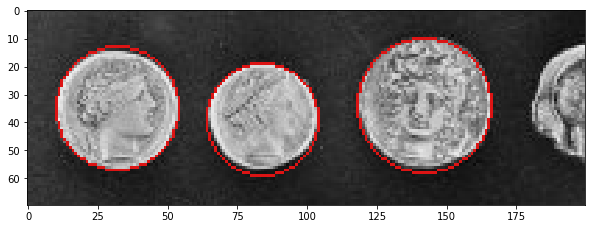

In [15]:
fig, ax = plt.subplots(ncols= 1, nrows= 1, figsize = (10, 4))
img = color.gray2rgb(img)

for center_y, center_x, radius in zip(cy, cx, radii):
  circy, circx = circle_perimeter(center_y, center_x, radius, shape= img.shape)
  img[circy, circx] = (220, 20 , 20)

ax.imshow(img, cmap= plt.cm.gray)
plt.show()

Now out aim is to detect the edge of a coffee cup.

In [0]:
import matplotlib.pyplot as plt
from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

Load picture convert to grayscale & detect edges

In [0]:
img_rgb = data.coffee()[0:220, 160:420]
img_gray = color.rgb2gray(img_rgb)
edges = canny(img_gray, sigma = 2.0, low_threshold= 0.55, high_threshold = 0.8)


In [0]:
# Perform a Hough Transform
# The accuracy corresponds to the bin size of a major axis.
# The value is chosen in order to get a single high accumulator.
# The threshold eliminates low accumulators

In [0]:
result = hough_ellipse(edges, accuracy=20, threshold=250,
                       min_size=100, max_size=120)
result.sort(order='accumulator')

Estimated parameters for the ellipse

In [0]:
bst = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in bst [1 : 5]]
orientation = bst[5]

Draw the ellipse on the original image

In [0]:
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
img_rgb[cy, cx] = (250, 0, 0)

Draw the edge (white) and the resulting ellipse (red)

In [0]:
edges = color.gray2rgb(img_as_ubyte(edges))
edges[cy, cx] = (250, 0, 0)



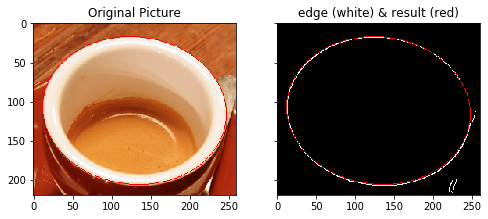

In [36]:
fig2, (ax1, ax2) = plt.subplots(ncols= 2, nrows= 1 , figsize= (8, 4), sharex= True, sharey= True)

ax1.set_title('Original Picture')
ax1.imshow(img_rgb)
ax2.set_title("edge (white) & result (red)")
ax2.imshow(edges)

plt.show()